**`GENERATIVE MODEL FOR DATA AUGMENTATION USING GAN`**

In [1]:
#importing the necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Defining the Generator model
def build_generator(latent_dim, output_shape):
    model = keras.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(np.prod(output_shape), activation='tanh'),
        layers.Reshape(output_shape)
    ])
    return model

In [3]:
# Defining the Discriminator model
def build_discriminator(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [4]:
# Builing and compiling the discriminator
input_shape = (28, 28, 1)  # Change this according to your input data shape
discriminator = build_discriminator(input_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [5]:
# Building the generator
latent_dim = 50
generator = build_generator(latent_dim, input_shape)

In [6]:
# Combined model (stacked generator and discriminator)
z = layers.Input(shape=(latent_dim,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
combined = keras.Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer='adam')

In [7]:
# Loading MNIST dataset
(x_train,_), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
# Normalizing data
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

In [9]:
# Training parameters
epochs = 50
batch_size = 32

In [12]:
# Training loop
for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]

In [13]:
# Generating a batch of fake images
noise = np.random.normal(0, 1,(batch_size, latent_dim))
fake_images = generator.predict(noise)


1/1 [==============================] - 0s 14ms/step


In [14]:
#Training the discriminator
d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

In [15]:
# Training the generator
noise = np.random.normal(0, 1, (batch_size, latent_dim))
g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

In [16]:
 # Printing the progress
if epoch % 100 == 0:
    print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

In [18]:
# Generating synthetic data
num_samples = 30
noise = np.random.normal(0, 1,(num_samples, latent_dim))
synthetic_data = generator.predict(noise)

#Printing the Synthetic data
print(synthetic_data)

1/1 [==============================] - 0s 21ms/step
[[[[ 7.40052685e-02]
   [ 2.35076994e-01]
   [ 8.15790892e-02]
   ...
   [-1.74680158e-01]
   [-1.85985699e-01]
   [-1.44776314e-01]]

  [[ 3.29170153e-02]
   [-8.07874948e-02]
   [-1.15275480e-01]
   ...
   [-2.33958140e-01]
   [ 2.49171376e-01]
   [-2.77919233e-01]]

  [[-1.73711106e-01]
   [-3.61595035e-01]
   [ 2.74579693e-03]
   ...
   [-3.32095802e-01]
   [-2.53661692e-01]
   [-1.88165203e-01]]

  ...

  [[ 2.96818223e-02]
   [ 1.16668558e-02]
   [-2.14030787e-01]
   ...
   [ 1.53337777e-01]
   [ 2.56302804e-01]
   [-1.35389149e-01]]

  [[-2.04369709e-01]
   [ 1.16778664e-01]
   [-3.67046356e-01]
   ...
   [-3.25374454e-02]
   [ 2.17898220e-01]
   [ 5.33310100e-02]]

  [[-4.99002077e-02]
   [ 1.38908029e-01]
   [-4.64764535e-02]
   ...
   [ 1.38503864e-01]
   [-1.12640195e-01]
   [-3.45389217e-01]]]


 [[[ 3.45656842e-01]
   [ 1.14450995e-02]
   [ 3.42432894e-02]
   ...
   [-1.30241752e-01]
   [-1.11536376e-01]
   [ 1.46256283e-

In [19]:
#Printing the shape of the originial and synthetic data
print(x_train.shape)
print(synthetic_data.shape)

(60000, 28, 28, 1)
(30, 28, 28, 1)


In [20]:
#reshaping the synthetic data
synthetic_data = synthetic_data.reshape((synthetic_data.shape[0],) + x_train.shape[1:])

In [21]:
#Concatenating the augumented data
augmented_data = np.concatenate((x_train, synthetic_data))

In [22]:
#Printing the augmented data
print(augmented_data)

[[[[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  ...

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]]


 [[[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.    

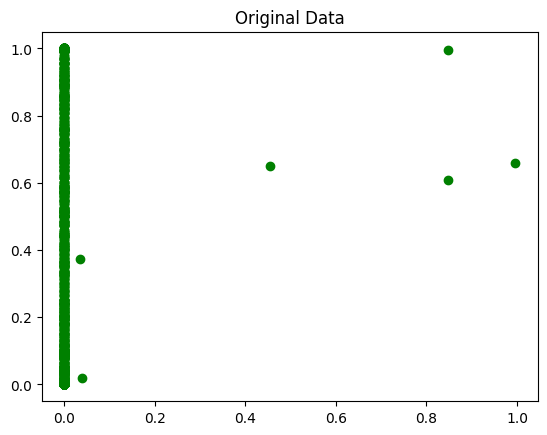

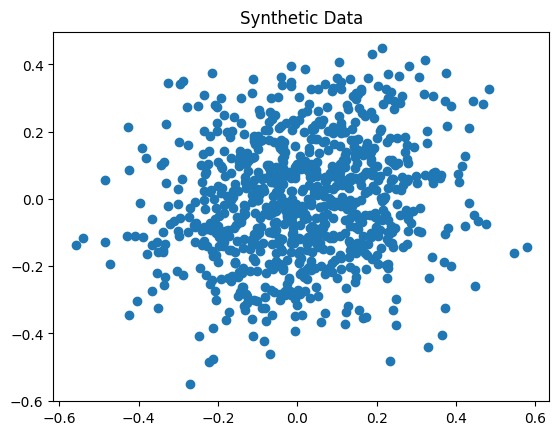

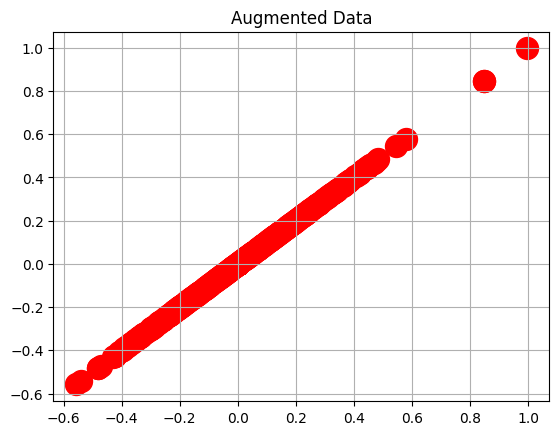

In [23]:
#Plotting the Original,synthetic and the augmented data

import matplotlib.pyplot as plt
# Scatter plot for original data
plt.scatter(x_train[:, 0], x_train[:, 1],c='g')
plt.title('Original Data')
plt.show()

# Scatter plot for synthetic data
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1])
plt.title('Synthetic Data')
plt.show()

# Scatter plot for augmented data
plt.scatter(augmented_data[:, 0], augmented_data[:, 0],c='r',s=250)
plt.grid()
plt.title('Augmented Data')
plt.show()